https://github.com/Golbstein/Fingernails-Segmentation
---



In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
import sys
sys.path.append('/content/gdrive/MyDrive/capstone/segmentation/fs/fs')

%matplotlib inline
import utils_nails
from utils_nails import *

datasetpath='/content/gdrive/MyDrive/capstone/segmentation/fs/fs/nails.tar.gz'

import matplotlib.pyplot as plt
from matplotlib.image import imread
from PIL import Image

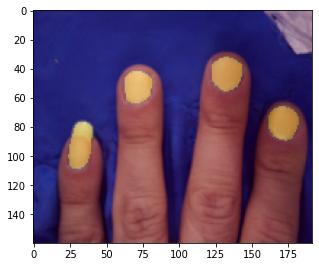

In [3]:
# initialize instance
# dataset = datasetpath
seg = fingernailseg(datasetpath)
# show random example from training set
seg.plot_example(np.random.randint(seg.X_train.__len__()))
# create U-Net model
seg.create_unet()

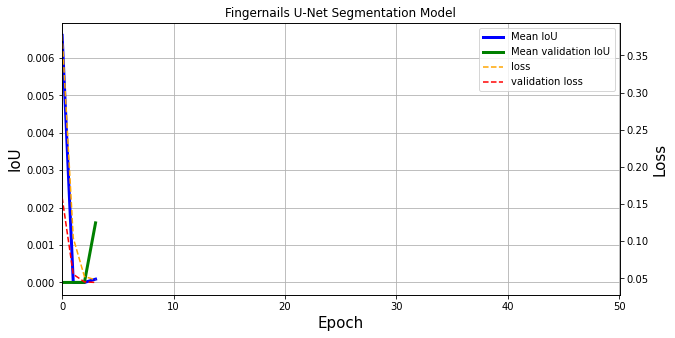

In [ ]:
seg.fit()
seg.load_model()

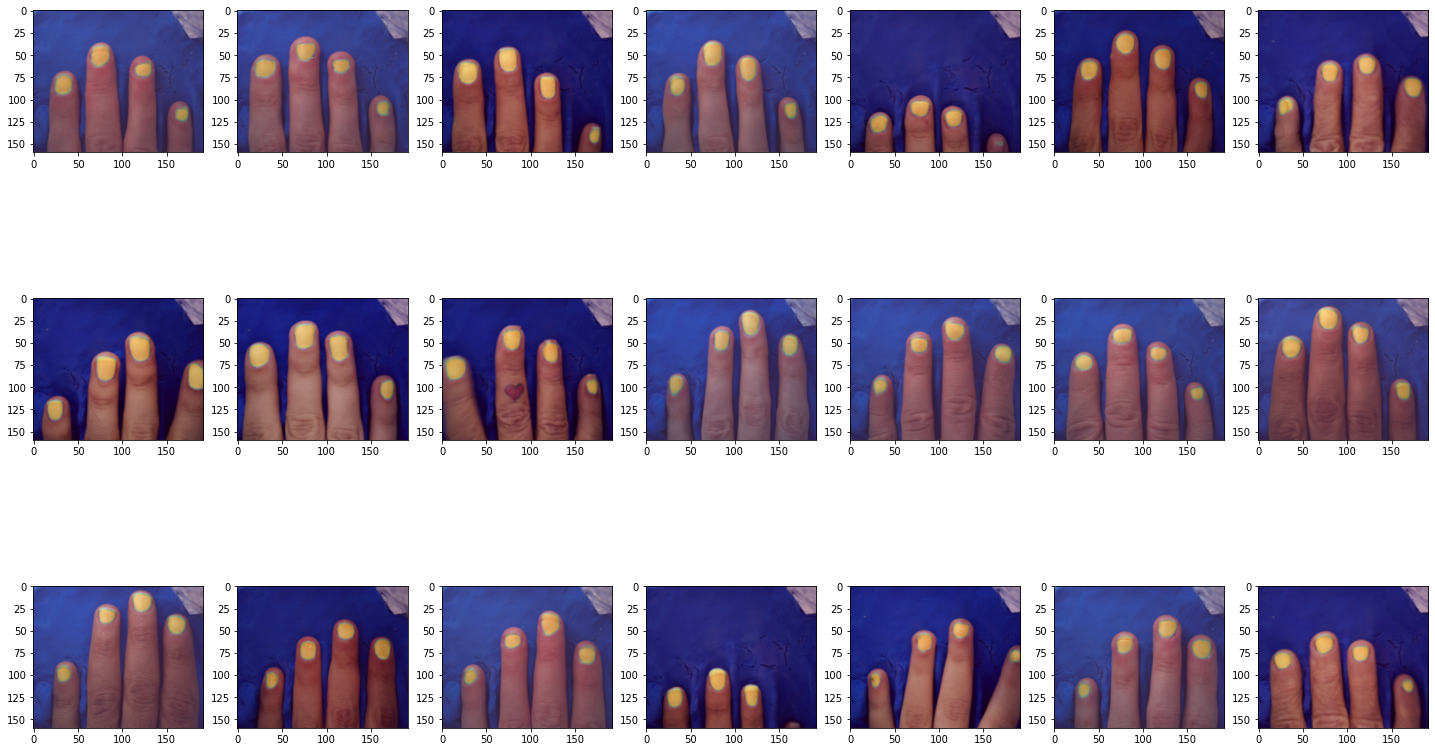

In [5]:
mask = seg.predict()
raw = seg.X_test
plt.figure(figsize=(25,15))
for i in range(len(mask)):
    plt.subplot(3, 7, i+1)
    plt.imshow(raw[i])
    plt.imshow(mask[i,:,:,0], alpha=0.3)

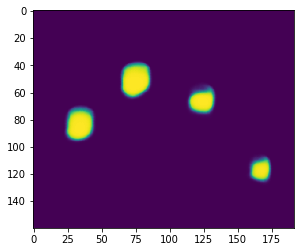

In [6]:
plt.imshow(mask[0,:,:,-1])

Text(0.5, 1.0, 'Fingernails segmentation of test image')

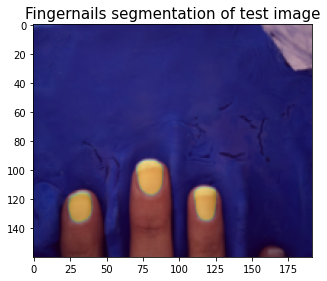

In [7]:
mask = seg.predict()
plt.figure(figsize=(5,5))

rand_image = np.random.randint(seg.X_test.__len__())
plt.imshow(raw[rand_image,:,:,:])
plt.imshow(mask[rand_image,:,:,0], alpha=0.3)
plt.title('Fingernails segmentation of test image', fontsize=15)

In [ ]:

plt.figure(figsize=(5,5))

rand_image = np.random.randint(seg.X_test.__len__())
plt.imshow(raw[rand_image,:,:,:])
plt.imshow(mask[rand_image,:,:,0], alpha=0.3)
plt.title('Fingernails segmentation of test image', fontsize=15)

In [ ]:
a=Image.open('/content/gdrive/MyDrive/capstone/segmentation/fs/fs/11.jpg')
# a=a.resize((192,160))
k=imread('/content/gdrive/MyDrive/capstone/segmentation/fs/fs/11.jpg')
plt.imshow(a)

#model.predict(self.testData, batch_size=self.batch_size, verbose=0)
a=Image.open('/content/gdrive/MyDrive/capstone/segmentation/fs/fs/11.jpg')
a=np.array(a.resize((192,160)))
a=np.array(a).astype('float32')
a=a/255

a.shape

seg.model.predict(a,batch_size=4,verbose=0)

a=np.array(a.resize((192,160)))
a=a.mean(axis=2)
a

aa=seg.model.predict(a,4,0)

모듈 참고       
       raw = Image.open('nails/raw/'+f)
            raw = np.array(raw.resize(self.sz))
            X_train.append(raw)
        for f in test_files:
            try:
                raw = Image.open('nails/raw/'+f)
            except:
                continue
            raw = np.array(raw.resize(self.sz))
            X_test.append(raw)
        X_train = np.array(X_train).astype('float32')
        X_train /= 255
        X_test = np.array(X_test).astype('float32')
        X_test /= 255
        self.X_test = X_test
        self.X_train = X_train
        y = np.array(y)
        self.y = np.expand_dims(y,3)

In [ ]:
# a=tarfile.open('/content/gdrive/MyDrive/capstone/segmentation/fs/fs/nails.tar.gz')
# a.extractall()
# a.close()
# m=os.listdir('nails/mask')